In [2]:
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

%matplotlib inline

In [3]:
pwd

'C:\\Users\\Aluno\\Desktop\\Análise Furtos Veículos 2018'

In [4]:
data = pd.read_csv(r'Dados_Furtos_de_Veiculos_2018_Jan-Dez.csv', low_memory=False,delimiter=';', encoding='iso-8859-1', decimal=',')
filled_data = data
filled_data['LATITUDE'].fillna(filled_data['LATITUDE'].mean(), inplace=True)
filled_data['LONGITUDE'].fillna(filled_data['LONGITUDE'].mean(), inplace=True)
data.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2017,4102,4102/2017,01/01/2018 00:45,01/01/2018 01:12,31/12/2017,A NOITE,01/01/2018,01/01/2018 00:45,Desconhecida,...,BPI7536,SP,S.JOSE DOS CAMPOS,Cinza,FIAT/UNO ELETRONIC,1994.0,1994.0,AUTOMOVEL,NaN,NaN
1,2018,2,fev/18,01/01/2018 02:04,01/01/2018 02:13,01/01/2018,DE MADRUGADA,01/01/2018,01/01/2018 02:04,Desconhecida,...,CCS6913,SP,S.JOSE DOS CAMPOS,Vermelho,GM/MONZA GL,1994.0,1994.0,AUTOMOVEL,NaN,NaN
2,2018,7,jul/18,01/01/2018 10:13,01/01/2018 10:21,01/01/2018,DE MADRUGADA,01/01/2018,01/01/2018 10:13,Desconhecida,...,FDX0794,SP,S.JOSE DOS CAMPOS,Preta,YAMAHA/FAZER250 BLUEFLEX,2012.0,2013.0,MOTOCICLO,NaN,NaN
3,2018,9,set/18,01/01/2018 10:53,01/01/2018 11:12,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 10:53,Desconhecida,...,KZF7010,SP,S.JOSE DOS CAMPOS,Vermelho,YAMAHA/FACTOR YBR125 ED,2011.0,2011.0,MOTOCICLO,NaN,NaN
4,2018,17,17/2018,01/01/2018 19:09,01/01/2018 19:16,01/01/2018,PELA MANHÃ,01/01/2018,01/01/2018 19:09,Desconhecida,...,KWZ1020,SP,S.JOSE DOS CAMPOS,Prata,YAMAHA/YBR 125ED,2007.0,2007.0,MOTOCICLO,NaN,NaN


In [5]:
data.rename(columns={'DESCR_MARCA_VEICULO': 'Modelo_Veiculos',
                     'DATAOCORRENCIA': 'Data_Ocorrencia',
                     'PERIDOOCORRENCIA': 'Periodo_Ocorrencia'
}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 54 columns):
ANO_BO                      3158 non-null int64
NUM_BO                      3158 non-null int64
NUMERO_BOLETIM              3158 non-null object
BO_INICIADO                 3158 non-null object
BO_EMITIDO                  3158 non-null object
Data_Ocorrencia             3158 non-null object
Periodo_Ocorrencia          3158 non-null object
DATACOMUNICACAO             3158 non-null object
DATAELABORACAO              3158 non-null object
BO_AUTORIA                  3158 non-null object
FLAGRANTE                   3158 non-null object
NUMERO_BOLETIM_PRINCIPAL    145 non-null object
LOGRADOURO                  2738 non-null object
NUMERO                      3148 non-null float64
BAIRRO                      2640 non-null object
CIDADE                      2738 non-null object
UF                          2738 non-null object
LATITUDE                    3158 non-null float64
LONGITUDE   

In [7]:
data.sample(10)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,Data_Ocorrencia,Periodo_Ocorrencia,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,Modelo_Veiculos,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
1271,2018,1297,1297/2018,04/06/2018 09:12,04/06/2018 09:35,04/06/2018,DE MADRUGADA,04/06/2018,04/06/2018 09:12,Desconhecida,...,QMU5583,MG,BELO HORIZONTE,Branco,VW/FOX CL MBV,2017.0,2018.0,AUTOMOVEL,NaN,NaN
643,2018,834,834/2018,15/03/2018 19:18,15/03/2018 19:30,15/03/2018,A TARDE,15/03/2018,15/03/2018 19:18,Desconhecida,...,FFV5296,SP,S.JOSE DOS CAMPOS,Vermelho,FIAT/UNO WAY 1.0,2012.0,2013.0,AUTOMOVEL,NaN,NaN
590,2018,871,871/2018,10/03/2018 22:16,10/03/2018 22:27,10/03/2018,A NOITE,10/03/2018,10/03/2018 22:16,Desconhecida,...,DSQ1257,SP,S.JOSE DOS CAMPOS,Preta,VW/FOX 1.0,2006.0,2006.0,AUTOMOVEL,NaN,NaN
763,2018,1035,1035/2018,31/03/2018 10:02,31/03/2018 10:08,31/03/2018,PELA MANHÃ,31/03/2018,31/03/2018 10:02,Desconhecida,...,BIB9436,SP,S.JOSE DOS CAMPOS,Branco,GM/KADETT SL/E,1990.0,1990.0,AUTOMOVEL,NaN,NaN
95,2018,62317,62317/2018,15/01/2018 11:53,15/01/2018 11:53,14/01/2018,A NOITE,15/01/2018,15/01/2018 11:53,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,2018,247,247/2018,10/04/2018 18:01,10/04/2018 18:10,09/04/2018,A TARDE,10/04/2018,10/04/2018 18:01,Desconhecida,...,BOH5131,SP,S.JOSE DOS CAMPOS,Vermelho,FIAT/UNO ELETRONIC,1994.0,1994.0,AUTOMOVEL,NaN,NaN
317,2018,427,427/2018,04/02/2018 23:52,05/02/2018 00:01,04/02/2018,A NOITE,04/02/2018,04/02/2018 23:52,Desconhecida,...,FPN7380,SP,S.JOSE DOS CAMPOS,Prata,VW/NOVO CROSSFOX MA,2015.0,2016.0,AUTOMOVEL,NaN,NaN
9,2018,23,23/2018,02/01/2018 19:28,02/01/2018 19:40,02/01/2018,A NOITE,02/01/2018,02/01/2018 19:28,Desconhecida,...,CTK7920,SP,S.JOSE DOS CAMPOS,Cinza,VW/PARATI LS,1985.0,1986.0,AUTOMOVEL,NaN,NaN
2549,2018,1072,1072/2018,17/10/2018 17:26,17/10/2018 17:39,17/10/2018,EM HORA INCERTA,17/10/2018,17/10/2018 17:26,Desconhecida,...,FNC8930,SP,SAO JOSE DOS CAMPOS,Preta,VW/NOVO VOYAGE 1.0,2013.0,2014.0,AUTOMOVEL,NaN,NaN
2610,2018,3499,3499/2018,24/10/2018 06:50,24/10/2018 07:25,24/10/2018,DE MADRUGADA,24/10/2018,24/10/2018 06:50,Desconhecida,...,CPX9544,SP,SAO JOSE DOS CAMPOS,Vermelho,VW/GOL GL 1.8 MI,1997.0,1998.0,AUTOMOVEL,NaN,NaN


# Os 10 veículos mais visados em 2018

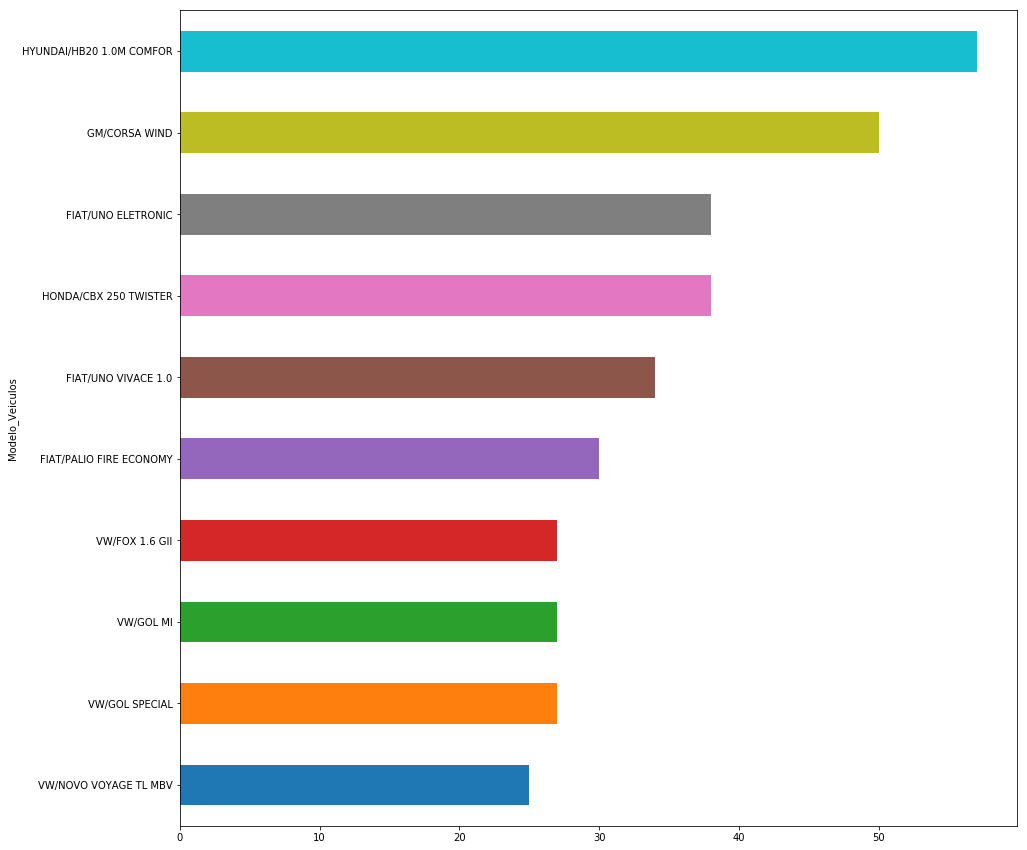

In [8]:
data.groupby('Modelo_Veiculos').size().sort_values().tail(10).plot(kind='barh', figsize=(15,15))

# Período do dia em que mais se furtam

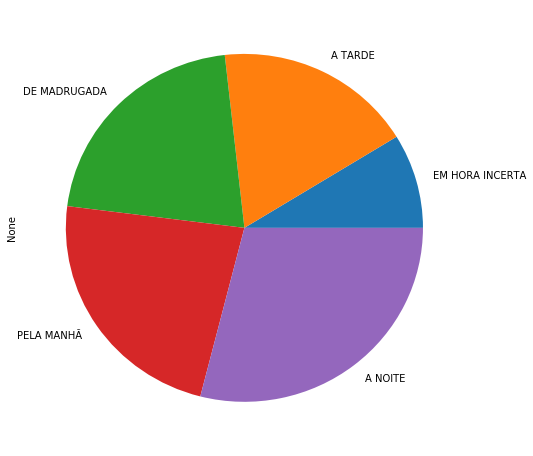

In [18]:
data.groupby('Periodo_Ocorrencia').size().sort_values().plot(kind= 'pie', figsize=(8,8))

# Mapa de Calor

Locais mais visados para furtos em São José dos Campos e Caçapava

In [10]:
m = folium.Map([-23.2082, -45.8494], zoom_start=11)

In [11]:
LOCAIS = data[['LATITUDE', 'LONGITUDE']].values #utilizar .values
HeatMap(LOCAIS).add_to(m)
m